In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils.usps import *

## Linear Regression

In [2]:
a = 97.28
sigma = 50

xtrain = np.linspace(0, 2, 100).reshape(-1, 1)
ytrain = xtrain * a + np.random.uniform(-sigma, sigma, (100,1))


In [3]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
linreg.score(xtrain, ytrain)

C:\Users\Jules Dubreuil\AppData\Roaming\Python\Python39\site-packages\numpy\linalg\linalg.py:2559: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


0.0

In [4]:
w = linreg.linear._parameters[0][0]
print(f"Predicted linear coefficient: {w}")
print(f"MSE Loss : {linreg.loss_list[-1]}")

Predicted linear coefficient: nan
MSE Loss : nan


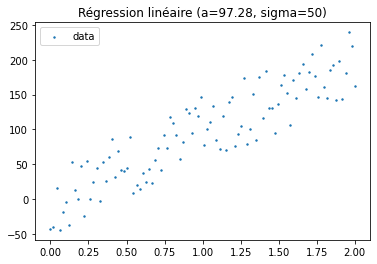

In [5]:
plt.figure()
plt.title(f"Régression linéaire (a={a}, sigma={sigma})")
plt.scatter(xtrain.reshape(1, -1), ytrain.reshape(1, -1), s=2, label="data")
# toPlot = [w * x[0] for x in xtrain]
# plt.plot(xtrain.reshape(1, -1)[0], toPlot, color="mediumslateblue", label="Model")
plt.legend()
plt.show()


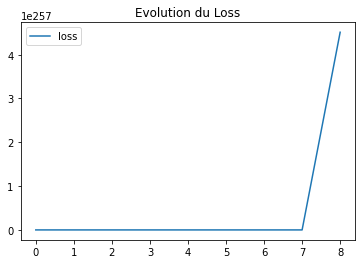

In [9]:
plt.figure()
plt.title("Evolution du Loss")
plt.plot(linreg.loss_list, label="loss")
plt.legend()

plt.show()

## Non-Linear

In [10]:
neg, pos = 6, 9
data69x,data69y = get_usps([neg,pos],datax,datay)
test69x,test69y = get_usps([neg,pos],testx,testy)
data69y = np.where(data69y == pos, 1, -1).reshape(-1, 1)
test69y = np.where(test69y == pos, 1, -1).reshape(-1, 1)

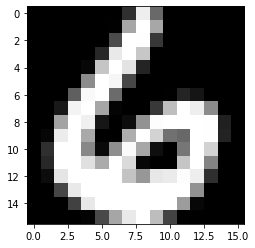

In [10]:
show_usps(data69x[0])

In [11]:
batch_size, input_size = data69x.shape
hidden_size = 128

In [12]:
model = [Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, 1), Sigmoid()]
mse = MSELoss()

In [13]:
input = data69x
inputs = []
for module in model:
    input = module.forward(input)
    inputs.append(input)

input

array([[9.99996010e-01],
       [4.70500589e-04],
       [9.99454832e-01],
       ...,
       [9.90089297e-01],
       [1.93472468e-06],
       [2.97218277e-04]])

In [16]:
loss = mse.forward(data69y, input)
loss

array([[3.99998404e+00],
       [1.00094122e+00],
       [3.99781962e+00],
       ...,
       [9.82220395e-05],
       [9.99996131e-01],
       [9.99405652e-01]])

In [17]:
delta = mse.backward(data69y, input)
deltas = []

for idx in range(len(model)-1, 0, -1):
    delta = model[idx].backward_delta(inputs[idx-1], delta)
    deltas.append(delta)

delta

array([[-5.87581212e-12,  7.22839953e-16, -4.95947895e-09, ...,
        -2.41279608e-07,  4.39036346e-11,  2.83464828e-11],
       [-1.86245330e-07,  5.93779409e-11, -1.56809795e-04, ...,
        -5.81246172e-13,  1.52002279e-05,  4.81541495e-07],
       [-2.96145934e-08,  3.31184718e-10, -4.54085844e-07, ...,
        -4.66795746e-09,  4.70717624e-09,  8.10093901e-07],
       ...,
       [ 1.08501446e-12, -2.47526399e-11,  1.73277825e-09, ...,
         2.00180572e-13, -4.54517700e-14, -5.91887091e-07],
       [ 1.01517610e-08, -3.66188651e-15,  5.69156130e-11, ...,
         4.02333670e-16, -9.58141796e-09, -2.02062065e-13],
       [ 3.48257754e-10, -2.92665463e-09,  1.72293445e-11, ...,
         2.47016250e-12, -1.15124816e-04, -1.97730031e-07]])

In [18]:
for module in model:
    module.update_parameters()
    module.zero_grad()

## Multi-Class

In [6]:
datax,datay = load_usps("../data/USPS_train.txt")
testx,testy = load_usps("../data/USPS_test.txt")

In [5]:
batch_size, input_size = datax.shape
output_size = 10
hidden_size = 128

In [6]:
net = Sequential(
    Linear(input_size, hidden_size), Tanh(), Linear(hidden_size, output_size), Sigmoid()
)
loss = CELoss()
optimizer = Optimizer(net, loss)


In [7]:
yhat, loss = optimizer.step(datax, datay)
yhat

ValueError: operands could not be broadcast together with shapes (7291,) (7291,10) 

In [12]:
for _ in range(100):
    yhat, loss = optimizer.step(datax, datay)

yhat

array([[1.93386547e-07],
       [3.89942977e-06],
       [1.51530367e-09],
       ...,
       [9.99940624e-01],
       [9.99994227e-01],
       [9.99999919e-01]])